In [ ]:
# Importing Packages
import math, sys
import numpy as np
import matplotlib.pyplot as plt
import time
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
import random
from tqdm.notebook import tqdm

In [ ]:
# Rossler System
def x_dot(x1, y1, z1, x2, y2, z2, x3, y3, z3, w, k):
    x1_dot=-1*w[k]*y1-z1+eps*(x2-x1)
    x2_dot=-1*w[k]*y2-z2+eps*(x1-x2)
    Phi_m=np.arctan2(0.5*(y1+y2),0.5*(x1+x2))

    x3_dot=-y3-z3+alp*(np.sqrt(pow(x3,2)+pow(y3,2))*np.cos(Phi_m)-x3)
    return x1_dot,x2_dot,x3_dot

def y_dot(x1, y1, z1, x2, y2, z2, x3, y3, z3, w, k):
    y1_dot=w[k]*x1+a*y1
    y2_dot=w[k]*x2+a*y2
    y3_dot=x3+a*y3
    return y1_dot,y2_dot,y3_dot

def z_dot(x1, y1, z1, x2, y2, z2, x3, y3, z3, w, k):
    z1_dot=b+z1*(x1-c)
    z2_dot=b+z2*(x2-c)
    z3_dot=b+z3*(x3-c)
    return z1_dot,z2_dot,z3_dot

In [ ]:
# 4th order Runge Kutta (RK-4) numerical method
def RungeKutta4(a1,b1,c1,a2,b2,c2,a3,b3,c3,n,w):

    x1 = np.zeros(n)
    y1 = np.zeros(n)
    z1 = np.zeros(n)

    x2 = np.zeros(n)
    y2 = np.zeros(n)
    z2 = np.zeros(n)

    x3 = np.zeros(n)
    y3 = np.zeros(n)
    z3 = np.zeros(n)
    t = np.zeros(n)

    x1[0] = a1
    y1[0] = b1
    z1[0] = c1

    x2[0] = a2
    y2[0] = b2
    z2[0] = c2

    x3[0] = a3
    y3[0] = b3
    z3[0] = c3

    t[0] = 0
    dt = 0.01

    #Compute the approximate solution at equally spaced times.
    for k in range(n-1):

        t[k+1] = t[k] + dt

        k1,u1,p1 = x_dot(x1[k], y1[k], z1[k], x2[k], y2[k], z2[k], x3[k], y3[k], z3[k], w,k)
        l1,v1,q1 = y_dot(x1[k], y1[k], z1[k], x2[k], y2[k], z2[k],x3[k], y3[k], z3[k], w,k)
        m1,w1,r1 = z_dot(x1[k], y1[k], z1[k], x2[k], y2[k], z2[k],x3[k], y3[k], z3[k], w,k)

        k2,u2,p2 = x_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt),
         (x2[k] + 0.5*u1*dt), (y2[k] + 0.5*v1*dt), (z2[k] + 0.5*w1*dt),
          (x3[k]+ 0.5*p1*dt), (y3[k]+ 0.5*q1*dt), (z3[k]+ 0.5*r1*dt), w,k)
        l2,v2,q2 = y_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt),
         (x2[k] + 0.5*u1*dt), (y2[k] + 0.5*v1*dt), (z2[k] + 0.5*w1*dt),
          (x3[k]+ 0.5*p1*dt), (y3[k]+ 0.5*q1*dt), (z3[k]+ 0.5*r1*dt), w,k)
        m2,w2,r2 = z_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt),
         (x2[k] + 0.5*u1*dt), (y2[k] + 0.5*v1*dt), (z2[k] + 0.5*w1*dt),
          (x3[k]+ 0.5*p1*dt), (y3[k]+ 0.5*q1*dt), (z3[k]+ 0.5*r1*dt), w,k)

        k3,u3,p3 = x_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt),
         (x2[k] + 0.5*u2*dt), (y2[k] + 0.5*v2*dt), (z2[k] + 0.5*w2*dt),
          (x3[k]+ 0.5*p2*dt), (y3[k]+ 0.5*q2*dt), (z3[k]+ 0.5*r2*dt), w,k)
        l3,v3,q3 = y_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt),
         (x2[k] + 0.5*u2*dt), (y2[k] + 0.5*v2*dt), (z2[k] + 0.5*w2*dt),
          (x3[k]+ 0.5*p2*dt), (y3[k]+ 0.5*q2*dt), (z3[k]+ 0.5*r2*dt), w,k)
        m3,w3,r3 = z_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt),
         (x2[k] + 0.5*u2*dt), (y2[k] + 0.5*v2*dt), (z2[k] + 0.5*w2*dt),
          (x3[k]+ 0.5*p2*dt), (y3[k]+ 0.5*q2*dt), (z3[k]+ 0.5*r2*dt), w,k)

        k4,u4,p4 = x_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt),
         (x2[k]+ u3*dt), (y2[k] + v3*dt), (z2[k] + w3*dt),
          (x3[k]+ p3*dt), (y3[k]+ q3*dt), (z3[k]+ r3*dt), w,k)
        l4,v4,q4 = y_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt),
         (x2[k]+ u3*dt), (y2[k] + v3*dt), (z2[k] + w3*dt),
          (x3[k]+ p3*dt), (y3[k]+ q3*dt), (z3[k]+ r3*dt), w,k)
        m4,w4,r4 = z_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt),
         (x2[k]+ u3*dt), (y2[k] + v3*dt), (z2[k] + w3*dt),
          (x3[k]+ p3*dt), (y3[k]+ q3*dt), (z3[k]+ r3*dt), w,k)

        x1[k+1] = x1[k] + (dt*(k1 + 2*k2 + 2*k3 + k4) / 6)
        y1[k+1] = y1[k] + (dt*(l1 + 2*l2 + 2*l3 + l4) / 6)
        z1[k+1] = z1[k] + (dt*(m1 + 2*m2 + 2*m3 + m4) / 6)

        x2[k+1] = x2[k] + (dt*(u1 + 2*u2 + 2*u3 + u4) / 6)
        y2[k+1] = y2[k] + (dt*(v1 + 2*v2 + 2*v3 + v4) / 6)
        z2[k+1] = z2[k] + (dt*(w1 + 2*w2 + 2*w3 + w4) / 6)

        x3[k+1] = x3[k] + (dt*(p1 + 2*p2 + 2*p3 + p4) / 6)
        y3[k+1] = y3[k] + (dt*(q1 + 2*q2 + 2*q3 + q4) / 6)
        z3[k+1] = z3[k] + (dt*(r1 + 2*r2 + 2*r3 + r4) / 6)

    return x1,y1,z1,x2,y2,z2,x3,y3,z3,t


In [ ]:
# Original Message
def message():
  frequency = 0.05
  duration = 100
  sampling_rate = 100

  # Create a time vector
  t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
  signal = np.where(np.sin(2 * np.pi * frequency * t) >= 0, 0, 1)
  return signal


In [ ]:
# Managing Phase
def getPhase(x,y):
  p1 = np.zeros(len(x), dtype=x.dtype)

  if x[0]<0:
    p1[0] = np.arctan(y[0]/x[0]) + np.pi
  else:
    p1[0] = np.arctan(y[0]/x[0])

  for i in range(len(x)-1):
    i1 = i+1

    if x[i1]<0:
      p1[i1] = np.arctan(y[i1]/x[i1]) + np.pi
    else:
      p1[i1] = np.arctan(y[i1]/x[i1])

    if p1[i1] < p1[i]:
      nlaps = np.ceil( (p1[i]-p1[i1])/(2*np.pi) )
      p1[i1] = p1[i1] + 2 * np.pi * nlaps

  return p1

In [ ]:
# Initial conditions and function call
alp=4.3
eps=0.005
a = 0.15
b= 0.2
c= 10
N= 10000
dt=0.01
m=message()
wo=[]
for i in m:
  if i==1:
    wo.append(1+0.01)
  else:
    wo.append(1-0.01)

x_1, y_1, z_1, x_2, y_2, z_2, x_3, y_3, z_3, t = RungeKutta4(2, 4.5, 11, 2, 4, 1.1, 2, 4, 3.2, N, wo)

phi_m=getPhase(0.5*(x_1+x_2),0.5*(y_1+y_2))
phi_3=getPhase(x_3,y_3)



Text(0, 0.5, '$\\phi_m-\\phi_3$')

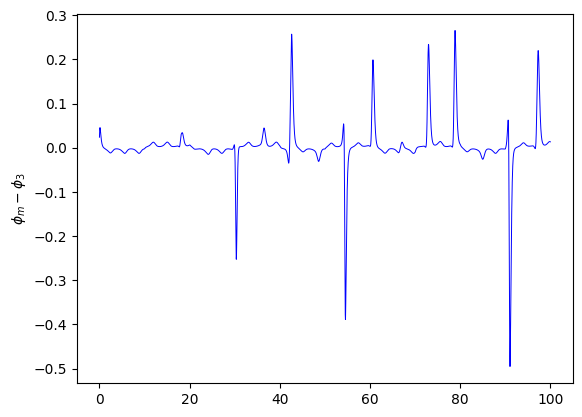

In [ ]:
# Calculating synchronization error
E=[(i-j) for i,j in zip(phi_m,phi_3)]
plt.plot ( t, E , linewidth = 0.7, color = 'b' )
plt.ylabel('$\phi_m-\phi_3$')

Text(0, 0.5, '$\\phi_m-\\phi_3$')

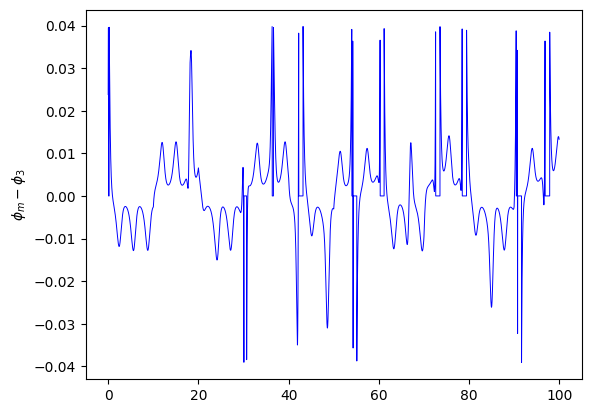

In [ ]:
# Setting Threshold
for i, j in enumerate(E):
  if j>0.04 or j<-0.04:
    E[i]=0
plt.plot ( t, E , linewidth = 0.7, color = 'b' )
plt.ylabel('$\phi_m-\phi_3$')

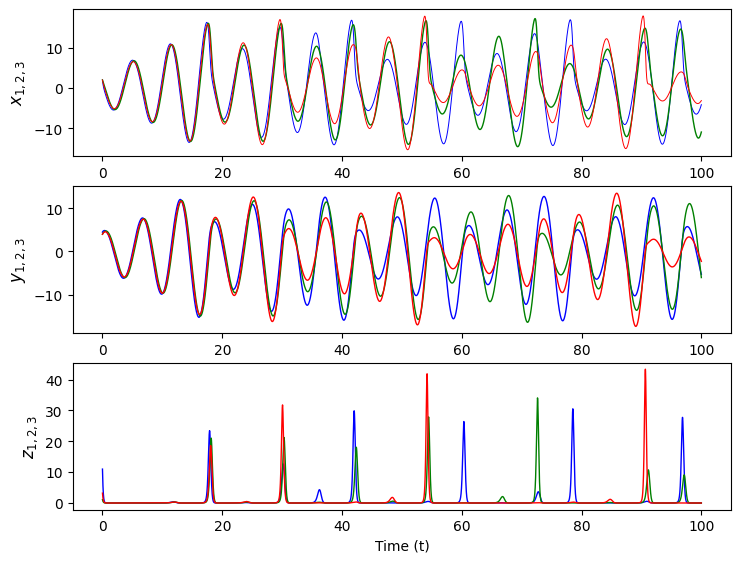

In [ ]:
#Phase sync plot
plt.figure (figsize = (8.5,6.5))
plt.subplot(3,1,1)
plt.plot ( t, x_1, linewidth = 0.7, color = 'b' )
plt.plot ( t, x_2, linewidth = 1, color = 'g' )
plt.plot ( t, x_3, linewidth = 0.7, color = 'r' )
plt.ylabel ( r'$x_{1,2,3}$',fontsize=12)

plt.subplot(3,1,2)
plt.plot ( t, y_1, linewidth = 1, color = 'b' )
plt.plot ( t, y_2, linewidth = 1, color = 'g' )
plt.plot ( t, y_3, linewidth = 1, color = 'r' )
plt.ylabel ( r'$y_{1,2,3}$',fontsize=12)

plt.subplot(3,1,3)
plt.plot ( t, z_1, linewidth = 1, color = 'b' )
plt.plot ( t, z_2, linewidth = 1, color = 'g' )
plt.plot ( t, z_3, linewidth = 1, color = 'r' )
plt.ylabel ( r'$z_{1,2,3}$',fontsize=12)
plt.xlabel ( 'Time (t)',fontsize=10)

plt.savefig('SC_PS-1.pdf', format='pdf')
plt.show ( )

In [ ]:
# Restoring message
m_=[]
for i in range(len(t)):
  if(E[i]<0):
    m_.append(0)
  else:
    m_.append(1)

In [ ]:
#Majority Cleaning Algorithm
np.random.seed(0)
message_length = 100
restored_message = np.array(m_)
noisy_message = restored_message.copy()
noise_indices = np.random.choice(message_length, size=10, replace=False)
noisy_message[noise_indices] = 1 - noisy_message[noise_indices]  # Flip 0s to 1s and vice versa

def clean_binary_message_majority_voting(binary_message, window_size=71):
    cleaned_message = []

    for i in range(len(binary_message)):
        start = max(0, i - window_size // 2)
        end = min(len(binary_message), i + window_size // 2 + 1)
        window = binary_message[start:end]
        cleaned_bit = 1 if sum(window) > len(window) // 2 else 0
        cleaned_message.append(cleaned_bit)

    return cleaned_message


cleaned_message_majority_voting = clean_binary_message_majority_voting(noisy_message)
# Evaluate the accuracy of themethod by comparing with the original message
accuracy_majority_voting = np.mean(cleaned_message_majority_voting == restored_message)
print(accuracy_majority_voting*100)


99.21


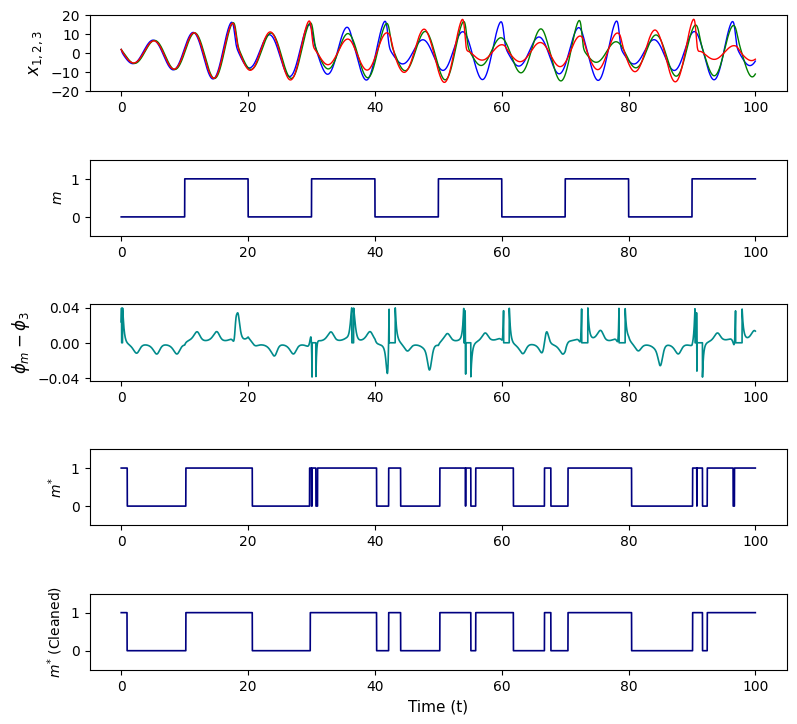

In [ ]:
#Secure communication Plot for Phase sync
plt.figure (figsize = (9,8.5))
plt.subplot(5,1,1)
plt.plot ( t, x_1, linewidth = 1, color = 'b' )
plt.plot ( t, x_2, linewidth = 1, color = 'g' )
plt.plot ( t, x_3, linewidth = 1, color = 'r' )
plt.yticks([-20,-10,0,10,20])
plt.ylabel ( r'$x_{1,2,3}$',fontsize=12)

plt.subplot(5,1,2)
plt.plot ( t, m, linewidth = 1.2, color = 'navy' )
plt.ylim(-0.5,1.5)
plt.ylabel ( r'$m$')

plt.subplot(5,1,3)
plt.plot ( t, E, linewidth = 1.2, color = 'darkcyan' )
plt.yticks([-0.04,0,0.04])
plt.ylabel('$\phi_m-\phi_3$',fontsize=12)

plt.subplot(5,1,4)
plt.plot ( t, restored_message, linewidth = 1.2, color = 'navy' )
plt.ylim(-0.5,1.5)
plt.ylabel ( r'$m^{*}$')

plt.subplot(5,1,5)
plt.plot ( t, cleaned_message_majority_voting, linewidth = 1.2, color = 'navy' )
plt.ylim(-0.5,1.5)
plt.xlabel ( 'Time (t)',fontsize=11)
plt.ylabel ( r'$m^{*}$ (Cleaned)')
plt.savefig('SC_PS-2.pdf', format='pdf')

plt.subplots_adjust(hspace=0.9)
plt.show ( )